This task is similar to previous week however we have 20% outliers in the test set. There are several ways to deal with outliers, among them we have 

a) Hypothesis Testing

b) Z-score method

c) Robust Z-score

d) I.Q.R method

e) Winsorization method (Percentile Capping)

f) DBSCAN Clustering

g) Isolation Forest

h) Linear Regression Models (PCA, LMS)

i) Standard Deviation

j) Percentile

k) Visualizing the data

However lets first test 

## Load in Libraries

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Project - Part 2

### Import Train Data

In [3]:
x_import = np.load("data/Xtrain_Regression2.npy")
y_import = np.load("data/Ytrain_Regression2.npy")
print(np.shape(x_import))
print(np.shape(y_import))

(100, 10)
(100, 1)


### Divide Train Data into two parts

In [4]:
def split_data(x_import,y_import,train_quantity,total_quantity,method="random"):

    test_quantity = total_quantity - train_quantity

    x_train = np.zeros(shape=(train_quantity, np.shape(x_import)[1]))
    y_train = np.zeros(shape=(train_quantity, np.shape(y_import)[1]))
    x_test = np.zeros(shape=(test_quantity, np.shape(x_import)[1]))
    y_test = np.zeros(shape=(test_quantity, np.shape(y_import)[1]))

    if method == "random":
        random_index = random.sample(range(0, total_quantity), test_quantity)
        train_index, test_index = 0, 0
        for i in range(np.shape(x_import)[0]):
            if i not in random_index:
                x_train[train_index] = x_import[i]
                y_train[train_index] = y_import[i]
                train_index += 1
            elif i in random_index:
                x_test[test_index] = x_import[i]
                y_test[test_index] = y_import[i]
                test_index += 1
        return (x_train,y_train,x_test,y_test)

    # deprecated method, splits the last elements
    if method == "last_elements":
        x_train = x_import[0:-1*test_quantity] 
        x_test = x_import[train_quantity:]
        y_train = y_import[0:-1*test_quantity]
        y_test = y_import[train_quantity:]

        return (x_train,y_train,x_test,y_test)       

xdiv_train,ydiv_train,xdiv_test,ydiv_test = split_data(x_import,y_import,75,np.shape(x_import)[0],method="random")
np.shape(xdiv_train)

(75, 10)

### Create Functions to implement the models

#### Linear Model

In [5]:
def linear_model(x, y, method="custom"):

    #add collumn of ones
    col_ones = np.ones((np.shape(x)[0],1))
    X = np.hstack([col_ones,x])

    if method == "custom":

        XT = np.transpose(X) #transpose ones
        XT_X = np.matmul(XT,X) # Find X^t*X
        XT_X_inv = np.linalg.inv(XT_X) # Find inverse
        XT_Y = np.matmul(XT,y) # Find X^t*y
        beta = np.matmul(XT_X_inv,XT_Y) # Find beta

        ## beta = np.linalg.tensorsolve(xt_x,xt_y) #solve for beta the equation: xt_x * beta = xt_y

        SSE = np.linalg.norm(y - np.matmul(X,beta))**2 # Find SSE
        print("beta =", beta, "\nSSE", SSE)

        return (beta, SSE)

    if method == "auto":

        model_auto = np.linalg.lstsq(X,y,rcond=None)
        beta = model_auto[0]
        SSE = model_auto[1][0]
        print("beta =", beta, "\nSSE", SSE)
        return (beta,SSE)

def test_linear_model(x,beta,y=False):
    col = np.ones((np.shape(x)[0],1))
    X = np.hstack([col,x])
    result = np.matmul(X,beta)

    if type(y) == np.ndarray:
        SSE = np.linalg.norm(y - np.matmul(X,beta))**2
    else:
        SSE = "y not given!"
        print("y not given! SSE not avaiable")

    return (result, SSE)

#### Polynomial Model

#### Ridge Model

#### Lasso Model

### Test Data

#### Trying to visualize outliars

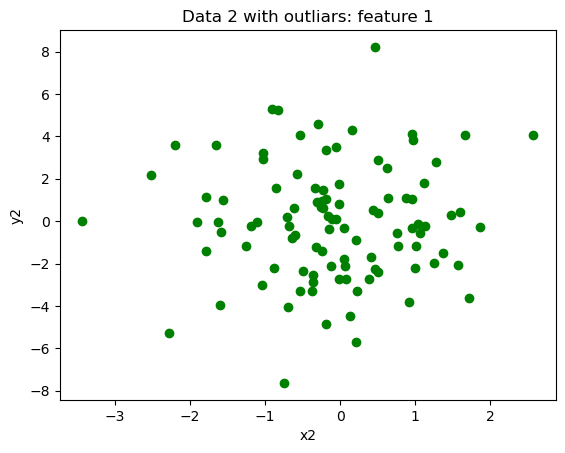

In [17]:
extra = x_import[:,0]
for i in range(1,np.shape(x_import)[1]):
    extra = extra + x_import[:,i]

feature = 2
ax = plt.gca()
ax.plot(x_import[:,feature],y_import,"go")
plt.axis('tight')
plt.xlabel('x2')
plt.ylabel('y2')
plt.title("Data 2 with outliars: feature "+str(feature-1))
plt.show()

#### Parameters and SSE direct from all data in the linear model

In [7]:
(beta_linear, SSE_linear) = linear_model(x_import,y_import, method="custom")
(beta_linear2, SSE_linear2) = linear_model(x_import,y_import, method="auto")

beta = [[ 0.01296159]
 [ 0.75272758]
 [ 0.05713452]
 [ 0.03194121]
 [ 0.12377613]
 [-0.61723231]
 [ 0.09024399]
 [ 0.229723  ]
 [-0.26175677]
 [ 0.8153488 ]
 [ 0.18309935]] 
SSE 559.1871310542703
beta = [[ 0.01296159]
 [ 0.75272758]
 [ 0.05713452]
 [ 0.03194121]
 [ 0.12377613]
 [-0.61723231]
 [ 0.09024399]
 [ 0.229723  ]
 [-0.26175677]
 [ 0.8153488 ]
 [ 0.18309935]] 
SSE 559.1871310542705


#### Train model with the 75% test data and Test model with the 25% test data

In [11]:
(xdiv_train,ydiv_train,xdiv_test,ydiv_test) = split_data(x_import,y_import,75,np.shape(x_import)[0],method="random")
(betadiv_linear, SSEdiv_linear) = linear_model(xdiv_train,ydiv_train)
(y_test_result,SSE_test) = test_linear_model(xdiv_test,betadiv_linear,ydiv_test)

# print('Result:',y_test_result)
print('SSE from test =', SSE_test)

beta = [[ 0.10306563]
 [ 0.68994309]
 [-0.02580608]
 [ 0.1370591 ]
 [ 0.18833742]
 [-0.66336139]
 [ 0.12469424]
 [ 0.12153085]
 [-0.32098385]
 [ 0.825174  ]
 [ 0.3024699 ]] 
SSE 458.08648978384207
SSE from test = 108.98231168890864


### Estimate Final Test Set

In [12]:
x_test_import = np.load("data/Xtest_Regression1.npy")
# Create x_test from x_test_import
x1 = np.ones((np.shape(x_test_import)[0],1))
xfinal_test= np.hstack((x1,x_test_import))
beta_final = np.copy(betadiv_linear)

# Result estimated 
result = np.matmul(xfinal_test,beta_final)
print(np.shape(beta_final))
print(np.shape(xfinal_test))
print(np.shape(result))

(11, 1)
(1000, 11)
(1000, 1)


### Other Models

#### Ridge

In [13]:
from sklearn import linear_model

def ridge_model(x,y,alph):
    col_ones = np.ones((np.shape(x)[0],1))
    X = np.hstack([col_ones,x])
    reg_ridge = linear_model.Ridge(alpha=alph,normalize=False,solver="auto")
    reg_ridge.fit(X,y)
    beta = reg_ridge.coef_[0]
    beta[0] = reg_ridge.intercept_[0]
    SSE = np.linalg.norm(y - np.matmul(X,np.transpose(reg_ridge.coef_)))**2
    return (beta,SSE)

(beta_ridge,SSE_ridge) = ridge_model(x_import,y_import,0.1)
print("beta (ridge) =",beta_ridge)
print("SSE from train (ridge) =",SSE_ridge)

beta (ridge) = [ 0.01291648  0.75168013  0.05677816  0.03191146  0.12376452 -0.616548
  0.09016722  0.22961771 -0.26147776  0.81457663  0.18277132]
SSE from train (ridge) = 559.1873335406859


In [15]:
# Split Data - good random split

(xdiv_train,ydiv_train,xdiv_test,ydiv_test) = split_data(x_import,y_import,80,np.shape(x_import)[0],method="random")

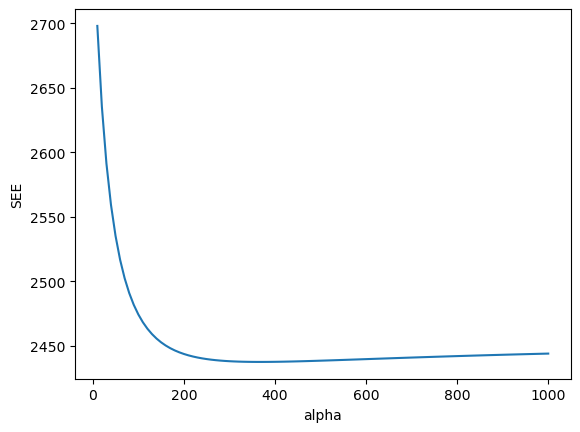

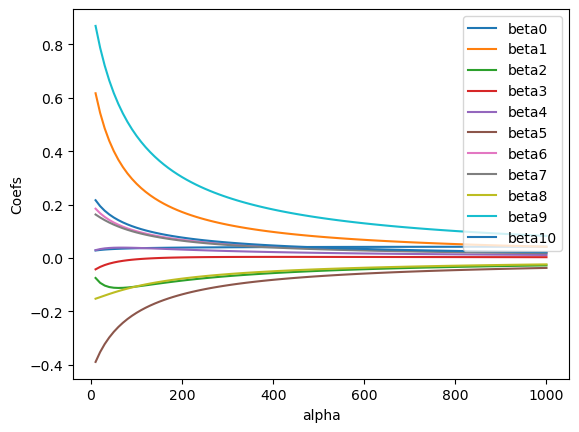

array([ 370.        , 2437.40787761])

In [16]:
alphas = np.linspace(10,1000,100)
SSEs_train = []
SSEs_test = []
coefs = []
y_test_result = []
SSE_test = []

for a in alphas:
    (beta_train,SSE_train) = ridge_model(xdiv_train,ydiv_train,a)
    (y_test_result,SSE_test) = test_linear_model(xdiv_test,beta_train,ydiv_test)
    SSEs_train.append(SSE_train)
    SSEs_test.append(SSE_test)
    coefs.append(beta_train)

ax = plt.gca()
ax.plot(alphas, SSEs_test)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('SEE')
plt.show()

ax2 = plt.gca()
ax2.plot(alphas, coefs)
ax2.legend(["beta0","beta1","beta2","beta3","beta4","beta5","beta6","beta7","beta8","beta9","beta10"])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefs')
plt.show()


#alp_SSE = np.hstack((np.transpose(alphas),np.transpose(SSEs_test)))
alp_SSE = np.transpose(np.vstack((alphas,SSEs_test)))
alp_SSE[np.argmin(alp_SSE,0)[1]]

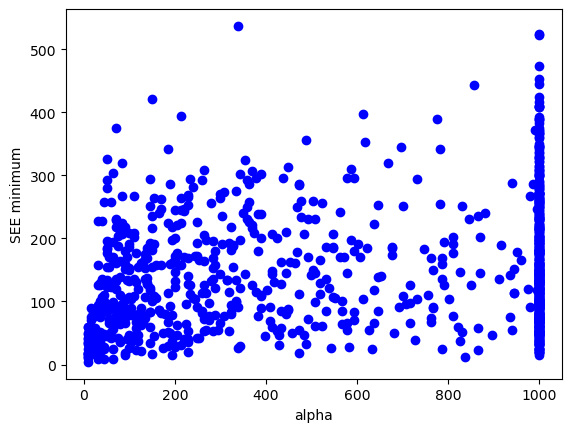

In [408]:
minimum = []

for i in range(1, 1000):
    (xrand_train,yrand_train,xrand_test,yrand_test) = split_data(x_import,y_import,95,np.shape(x_import)[0],method="random")
    alphas = np.linspace(10,1000,200)
    SSEs_train = []
    SSEs_test = []
    coefs = []
    y_test_result = []
    SSE_test = []

    for a in alphas:
        (beta_train,SSE_train) = ridge_model(xrand_train,yrand_train,a)
        (y_test_result,SSE_test) = test_linear_model(xrand_test,beta_train,yrand_test)
        SSEs_train.append(SSE_train)
        SSEs_test.append(SSE_test)
        coefs.append(beta_train)

    alp_SSE = np.transpose(np.vstack((alphas,SSEs_test)))
    minimum.append(alp_SSE[np.argmin(alp_SSE,0)[1]])

ax = plt.gca()
ax.plot(np.transpose(minimum)[0],np.transpose(minimum)[1], "bo")
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('SEE minimum')
plt.show()

#### Lasso

beta (lasso) = [-0.22904546  0.         -0.          0.          0.         -0.
  0.          0.          0.          0.          0.        ]
SSE from train (lasso) = 62463.41124978823


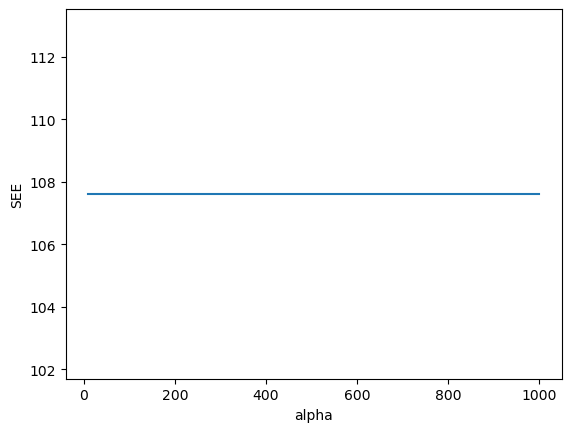

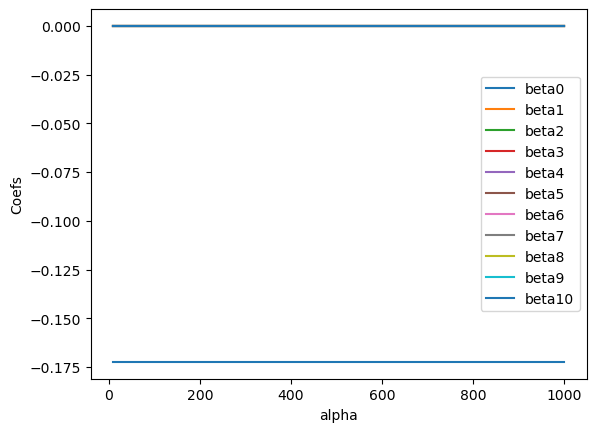

In [94]:
def lasso_model(x,y,alph):
    col_ones = np.ones((np.shape(x)[0],1))
    X = np.hstack([col_ones,x])
    reg_lasso = linear_model.Lasso(alpha=alph,normalize=False)
    reg_lasso.fit(X,y)
    beta = reg_lasso.coef_
    beta[0] = reg_lasso.intercept_[0]
    SSE = np.linalg.norm(y - np.matmul(X,np.transpose(reg_lasso.coef_)))**2
    return (beta,SSE)

(beta_lasso,SSE_lasso) = lasso_model(x_import,y_import,2)
print("beta (lasso) =",beta_lasso)
print("SSE from train (lasso) =",SSE_lasso)

alphas = np.linspace(10,1000,100)
SSEs_train = []
SSEs_test = []
coefs = []
y_test_result = []
SSE_test = []

(xdiv_train,ydiv_train,xdiv_test,ydiv_test) = split_data(x_import,y_import,95,np.shape(x_import)[0])

for a in alphas:
    (beta_train,SSE_train) = lasso_model(xdiv_train,ydiv_train,a)
    (y_test_result,SSE_test) = test_linear_model(xdiv_test,beta_train,ydiv_test)
    SSEs_train.append(SSE_train)
    SSEs_test.append(SSE_test)
    coefs.append(beta_train)

ax = plt.gca()
ax.plot(alphas, SSEs_test)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('SEE')
plt.show()

ax2 = plt.gca()
ax2.plot(alphas, coefs)
ax2.legend(["beta0","beta1","beta2","beta3","beta4","beta5","beta6","beta7","beta8","beta9","beta10"])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefs')
plt.show()

In [118]:
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()

pca = decomposition.PCA()

lasso = linear_model.Lasso()

pipe = Pipeline(steps=[("std_slc", std_slc),
                       ("pca", pca),
                       ("lasso", lasso)])

n_components = list(range(1,x_import.shape[1]+1,1))

normalize = [True, False]
selection = ["cyclic", "random"]

parameters = dict(pca__n_components=n_components,
                  lasso__normalize=normalize,
                  lasso__selection=selection)

clf = GridSearchCV(pipe, parameters)
clf.fit(x_import, y_import)

print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(clf.best_estimator_.get_params()["lasso"])

CV_Result = cross_val_score(clf, x_import, y_import, cv=11, n_jobs=-1, scoring="r2")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())
(y_test_result,SSE_test) = test_linear_model(x_import,CV_Result,y_import)    
SSE_test
    

Best Number Of Components: 8
Lasso()
[ 0.37974183  0.20657802  0.09560438  0.07809858  0.39385889 -0.07327867
 -0.20611151 -0.22863496  0.30775314  0.05084572  0.16721297]
0.1065153081414926
0.2040109723351131


70880.94946087559